<a href="https://colab.research.google.com/github/gmgriebeler/severity_of_accidents_on_highways/blob/main/severity_of_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Granting access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries that will be used
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.miscmodels.ordinal_model import OrderedModel

os.listdir('drive/My Drive/Modelacao de Transportes')

['A29_Acidentes_e_Incidentes_17_22.xlsx', 'Trabalho 2_B.ipynb']

In [3]:
# Loading the Excel spreadsheet into the DataFrame (df1)
df1 = pd.read_excel('drive/My Drive/Modelacao de Transportes/A29_Acidentes_e_Incidentes_17_22.xlsx')

# Selecting only rows related to Accidents occurrences (excluding Incident labeled rows)
df1 = df1.loc[(df1['Tipo'] == 'Acidente')]
df1

,Concessionaria,Sentido,Auto-Estrada,Sublanço,PK,Nó,Ramo,Cód Acidente,Tipo,Data de acidente,...,Nº Acidentes com Ligeiros+Articulados,Nº Acidentes com Ligeiros+Motos,Nº Acidentes com Ligeiros+Pesados,Nº Acidentes com Ligeiros+Motos+Pesados,Nº Acidentes com Motos+Articulados,Nº Acidentes com Motos+Pesados,Nº Acidentes com Pesados+Articulados,Nº Ocupantes Veiculo,Custo Total Danos,Custo Total Segurado
0,LCP,C,A29,Angeja - Salreu,1+700,Não atribuído,Não atribuído,2017-LCP000187,Acidente,2017-06-09,...,0,0,0,0,0,0,0,2,1917.60,2091.60
1,LCP,C,A29,Angeja - Salreu,3+350,Não atribuído,Não atribuído,2017-LCP000112,Acidente,2017-03-22,...,0,0,1,0,0,0,0,16,0.00,2718.16
2,LCP,C,A29,Angeja - Salreu,Não atribuído,Nó de Angeja (A29/A25),Ramo A,2017-LCP000248,Acidente,2017-08-18,...,0,0,0,0,0,0,0,1,0.00,0.00
3,LCP,C,A29,Angeja - Salreu,Não atribuído,Nó de Angeja (A29/A25),Ramo A,2017-LCP000320,Acidente,2017-11-03,...,0,0,0,0,0,0,0,2,1061.98,1219.98
4,LCP,C,A29,Salreu - Estarreja,10+575,Não atribuído,Não atribuído,2017-LCP000378,Acidente,2017-12-14,...,0,0,0,0,0,0,0,2,1458.73,1616.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,LCP,D,A29,(A29/A44) - Canelas (Gaia),49+300,Não atribuído,Não atribuído,2022-LCP000221,Acidente,2022-08-02,...,0,0,0,0,0,0,0,2,1557.40,1727.40
1095,LCP,D,A29,Canelas (Gaia) - Arrábida (IC2),50+600,Não atribuído,Não atribuído,2022-LCP000083,Acidente,2022-03-18,...,0,0,0,0,0,0,0,1,2100.18,2210.18
1096,LCP,D,A29,Canelas (Gaia) - Arrábida (IC2),51+325,Não atribuído,Não atribuído,2022-LCP000048,Acidente,2022-02-16,...,0,0,0,0,0,0,0,7,0.00,0.00
1097,LCP,D,A29,Hospital - IP1 (Freixo),52+100,Não atribuído,Não atribuído,2022-LCP000112,Acidente,2022-04-24,...,0,0,0,0,0,0,0,2,3520.00,3690.00


In [4]:
df1['Zona de Ocorrência'].unique()

array(['Secção Corrente', 'Ramo de Nó', 'Acessos à rede viária exterior',
       'Talude', 'Separador Central', 'Via Colectora', 'Não atribuído',
       'Area de Serviço / Repouso'], dtype=object)

In [5]:
len(df1.loc[(df1['Nº Ocupantes Veiculo'] == 2)])

278

In [6]:
# Defining categories for our target variable (Victims)
df1['victims'] = 0
df1.loc[(df1['Nº Vítimas'] == 0), 'victims'] = 0
df1.loc[(df1['Nº Vítimas'] == 1), 'victims'] = 1
df1.loc[(df1['Nº Vítimas'] >= 2), 'victims'] = 2

#df1['victims'] = df1['victims'].astype('category')


# Defining catergories for feature variables
df1['timeperiod'] = 0
df1.loc[(df1['Periodo Horário'] == '00-03') | (df1['Periodo Horário'] == '03-06'), 'timeperiod'] = 0
df1.loc[(df1['Periodo Horário'] == '06-09') | (df1['Periodo Horário'] == '09-12'), 'timeperiod'] = 1
df1.loc[(df1['Periodo Horário'] == '12-15') | (df1['Periodo Horário'] == '15-18'), 'timeperiod'] = 2
df1.loc[(df1['Periodo Horário'] == '18-21') | (df1['Periodo Horário'] == '21-24'), 'timeperiod'] = 3

df1['weather'] = 0
mautempo = ['Chuva Forte', 'Granizo', 'Nevoeiro']
df1.loc[(df1['Meteorologia'] == 'Bom Tempo'), 'weather'] = 0
df1.loc[(df1['Meteorologia'] == 'Chuva'), 'weather'] = 1
df1.loc[(df1['Meteorologia'].isin(mautempo)), 'weather'] = 2

df1['Estado do Piso'].unique()
df1['roadcondition'] = 0
df1.loc[(df1['Estado do Piso'] == 'Seco e Limpo'), 'roadcondition'] = 0
df1.loc[(df1['Estado do Piso'] == 'Molhado'), 'roadcondition'] = 1

# df1['Via'].unique()
# df1['lane'] = 0
# df1.loc[(df1['Via'] == 'Esquerda'), 'lane'] = 1
# df1.loc[(df1['Via'] == 'Central'), 'lane'] = 2
# df1.loc[(df1['Via'] == 'Direita'), 'lane'] = 3
# df1.loc[(df1['Via'] == 'Lentos/Berma'), 'lane'] = 4

df1['nature'] = 0
colisao = ['Colisão com Guardas de segurança', 'Choque em cadeia',
           'Colisão com Objecto', 'Colisão entre Veículos (Traseira)',
           'Colisão entre Veículos (Lateral)', 'Colisão com Animal',
           'Colisão entre Veículos (Frontal)','Colisão com Sinalização'
           'Colisão com Talude', 'Colisão com veículo parado na berma']
outros = ['Capotamento', 'Derrame', 'Incêndio', 'Carga Caída', 'Apedrejamento', 'Atropelamento (Peão)']
df1.loc[(df1['Natureza do Acidente'] == 'Despiste'), 'nature'] = 0
df1.loc[(df1['Natureza do Acidente'].isin(colisao)), 'nature'] = 1
df1.loc[(df1['Natureza do Acidente'].isin(outros)), 'nature'] = 2

df1['occupants'] = 0
df1.loc[(df1['Nº Ocupantes Veiculo'].between(0,3)), 'occupants'] = 0
df1.loc[(df1['Nº Ocupantes Veiculo'].between(2,5)), 'occupants'] = 1
df1.loc[(df1['Nº Ocupantes Veiculo'] > 4), 'occupants'] = 2
# df1.loc[(df1['Nº Ocupantes Veiculo'] > 4), 'occupants'] = 4


df1['luminosity'] = 0
claridade = ['Pleno Dia', 'Zona de Iluminação']
meio_claro = ['Crepúsculo ou Aurora', 'Noite com Luar']
df1.loc[(df1)['Luminosidade'].isin(claridade), 'luminosity'] = 0
df1.loc[(df1)['Luminosidade'].isin(meio_claro), 'luminosity'] = 1
df1.loc[(df1)['Luminosidade'] == 'Noite escura', 'luminosity'] = 2

df1['zone'] = 0
zonas = ['Acessos à rede viária exterior',
       'Talude', 'Separador Central', 'Via Colectora', 'Não atribuído',
       'Area de Serviço / Repouso']
df1.loc[(df1)['Zona de Ocorrência'] == 'Secção Corrente', 'zone'] = 0
df1.loc[(df1)['Zona de Ocorrência'] == 'Ramo de Nó', 'zone'] = 1
df1.loc[(df1)['Zona de Ocorrência'].isin(zonas), 'zone'] = 2

<Axes: >

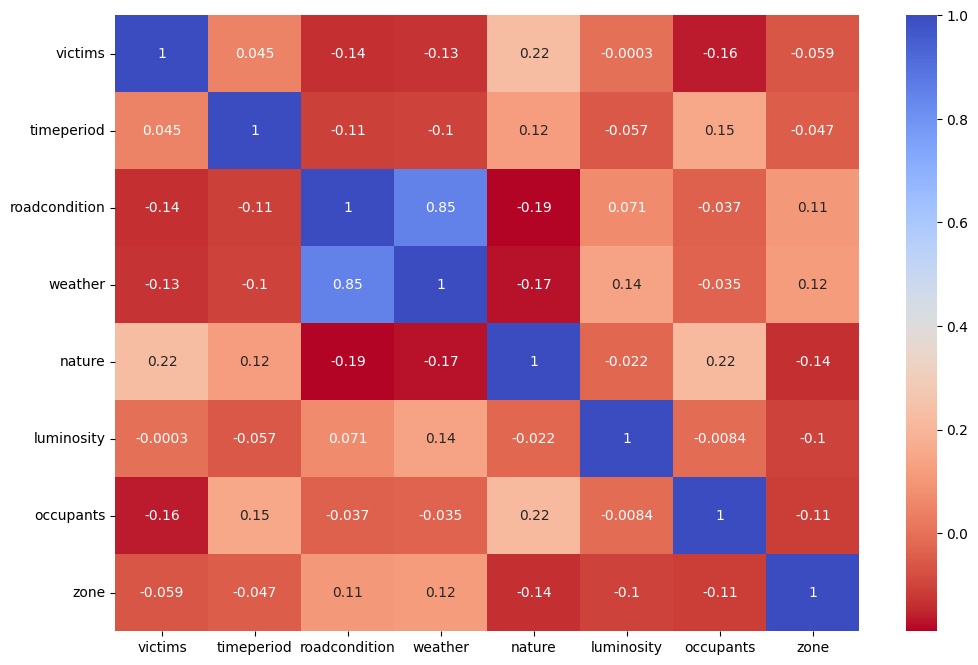

In [7]:
# Determining the correlation between the different features, in order to determine which combination of features
# would fit better on the model
plt.figure(figsize = (12, 8))

sns.heatmap(df1[['victims', 'timeperiod', 'roadcondition', 'weather', 'nature', 'luminosity', 'occupants', 'zone']].corr(),
            annot = True,
            cmap = 'coolwarm_r')

In [8]:
# Testing and implementing categorical orders to the features, in order to grant more reliable results to the model
sev_order = [1, 2, 3]
sev_order_0 = [0, 1, 2]

order = [1, 2]
order_0 = [0, 1]

order_4 = [1, 2, 3, 4]
order_4_0 = [0, 1, 2, 3]

# order_time = [1, 2, 3, 4]
df1['victims'] = pd.Categorical(df1['victims'], categories=sev_order_0, ordered=True)
df1['victims'].dtype
df1['timeperiod'] = pd.Categorical(df1['timeperiod'], categories=order_4_0, ordered=True)
df1['roadcondition'] = pd.Categorical(df1['roadcondition'], categories=order_0, ordered=True)
df1['weather'] = pd.Categorical(df1['weather'], categories=sev_order_0, ordered=True)
df1['nature'] = pd.Categorical(df1['nature'], categories=sev_order_0, ordered=True)
df1['luminosity'] = pd.Categorical(df1['luminosity'], categories=sev_order_0, ordered=True)
df1['occupants'] = pd.Categorical(df1['occupants'], categories=sev_order_0, ordered=True)
df1['zone'] = pd.Categorical(df1['zone'], categories=sev_order_0, ordered=True)

In [9]:
# Generating dummies associated with the different categories of each feature, aiming the correct functionin of the model
timeperiod = pd.get_dummies(df1['timeperiod'], prefix='timeperiod', drop_first=True)
roadcondition = pd.get_dummies(df1['roadcondition'], prefix='roadcondition', drop_first=True)
weather = pd.get_dummies(df1['weather'], prefix='weather', drop_first=True)
nature = pd.get_dummies(df1['nature'], prefix='nature', drop_first=True)
luminosity = pd.get_dummies(df1['luminosity'], prefix='luminosity', drop_first=True)
occupants = pd.get_dummies(df1['occupants'], prefix='occupants', drop_first=True)
zone = pd.get_dummies(df1['zone'], prefix='zone', drop_first=True)

dummies = pd.concat([timeperiod, roadcondition, weather, nature, luminosity, occupants, zone], axis=1)
dummies_final = pd.concat([roadcondition, nature, occupants], axis=1)

In [10]:
# Results obtained from the Ordered Probit Model applied on the features defined in "dummies_final"
mod_prob = OrderedModel(df1['victims'],
                        dummies_final,
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs', disp=False)
print(res_prob.summary())

                             OrderedModel Results                             
Dep. Variable:                victims   Log-Likelihood:                -552.76
Model:                   OrderedModel   AIC:                             1120.
Method:            Maximum Likelihood   BIC:                             1152.
Date:                Fri, 09 Feb 2024                                         
Time:                        16:26:53                                         
No. Observations:                 731                                         
Df Residuals:                     724                                         
Df Model:                           5                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
roadcondition_1    -0.2881      0.104     -2.764      0.006      -0.492      -0.084
nature_1            0.6700      0.115

In [11]:
nobs = len(df1)
df1["dummy"] = (np.arange(nobs) < (nobs / 2)).astype(float)

modfd_logit = OrderedModel.from_formula("victims ~ 1 + weather + zone + luminosity + timeperiod + roadcondition + nature + occupants +  C(dummy)", df1,
                                      distr='probit')
resfd_logit = modfd_logit.fit(method='bfgs')
print(resfd_logit.summary())

# mod_prob = OrderedModel(df1['victims'],
#                         dummies_final,
#                         distr='probit')

# res_prob = mod_prob.fit(method='bfgs', disp=False)
# print(res_prob.summary())

Optimization terminated successfully.
         Current function value: 0.747281
         Iterations: 66
         Function evaluations: 67
         Gradient evaluations: 67
                             OrderedModel Results                             
Dep. Variable:                victims   Log-Likelihood:                -546.26
Model:                   OrderedModel   AIC:                             1127.
Method:            Maximum Likelihood   BIC:                             1205.
Date:                Fri, 09 Feb 2024                                         
Time:                        16:26:56                                         
No. Observations:                 731                                         
Df Residuals:                     714                                         
Df Model:                          15                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

Text(0.5, 1.0, 'Histograma da Natureza do Acidente')

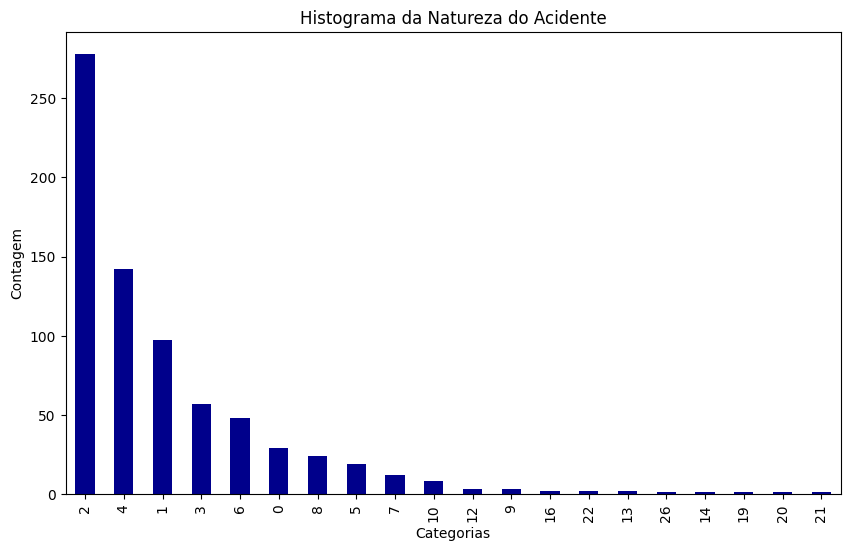

In [12]:
contagem_categorias = df1['Nº Ocupantes Veiculo'].value_counts()

plt.figure(figsize=(10, 6))
contagem_categorias.plot(kind='bar', color='darkblue')

plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title(f'Histograma da Natureza do Acidente')


In [13]:
num_of_thresholds = 2
mod_prob.transform_threshold_params(res_prob.params[-num_of_thresholds:])

array([       -inf, -0.38302735,  0.73386177,         inf])